# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# loading the dataset from the kaggle(https://www.kaggle.com/datasets/uciml/iris)

df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.shape

(150, 6)

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [7]:
# Loading the dataset from seaborn library through online 

df1=sns.load_dataset('iris')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df1.shape

(150, 5)

In [10]:
# will use kaggle dataset to work on classification problem

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.drop('Id',axis=1,inplace=True)

In [12]:
df.isnull().sum()    # their is no null values in the dataset

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
# will work on target variable
df.Species.value_counts()           # the data is completely balanced

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [22]:
X=df.drop('Species',axis=1)
y=df['Species']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [28]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [32]:
model=LogisticRegression()
model.fit(X_train,y_train)
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [34]:
print(classification_report(y_train,train_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        34
Iris-versicolor       0.97      0.94      0.95        32
 Iris-virginica       0.95      0.97      0.96        39

       accuracy                           0.97       105
      macro avg       0.97      0.97      0.97       105
   weighted avg       0.97      0.97      0.97       105



In [35]:
print(classification_report(y_test,test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [36]:
confusion_matrix(y_train,train_pred)

array([[34,  0,  0],
       [ 0, 30,  2],
       [ 0,  1, 38]], dtype=int64)

In [37]:
confusion_matrix(y_test,test_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [38]:
accuracy_score(y_test,test_pred)

0.9777777777777777

In [42]:
X1=sc.fit_transform(X)

In [43]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [44]:
X1=pd.DataFrame(X1,columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

In [47]:
X1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_vif=pd.DataFrame()
data_vif['Feature']=X1.columns

data_vif['VIF']=[variance_inflation_factor(X1.values,i)  for i in range(len(X1.columns))]
data_vif

,Feature,VIF
0,SepalLengthCm,7.103113
1,SepalWidthCm,2.099039
2,PetalLengthCm,31.397292
3,PetalWidthCm,16.141564


In [48]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [49]:
X2=df.drop(['Species','PetalLengthCm','PetalWidthCm'],axis=1)
y2=df['Species']

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.3,random_state=0)

In [51]:
model=LogisticRegression()
model.fit(X_train,y_train)
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [52]:
print(classification_report(y_train,train_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        34
Iris-versicolor       0.73      0.69      0.71        32
 Iris-virginica       0.76      0.79      0.77        39

       accuracy                           0.83       105
      macro avg       0.83      0.83      0.83       105
   weighted avg       0.83      0.83      0.83       105



In [53]:
print(classification_report(y_test,test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.81      0.72      0.76        18
 Iris-virginica       0.62      0.73      0.67        11

       accuracy                           0.82        45
      macro avg       0.81      0.82      0.81        45
   weighted avg       0.83      0.82      0.82        45



In [54]:
confusion_matrix(y_train,train_pred)

array([[34,  0,  0],
       [ 0, 22, 10],
       [ 0,  8, 31]], dtype=int64)

In [55]:
confusion_matrix(y_test,test_pred)

array([[16,  0,  0],
       [ 0, 13,  5],
       [ 0,  3,  8]], dtype=int64)

In [56]:
accuracy_score(y_test,test_pred)

0.8222222222222222

In [68]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [76]:
# here we want to predict what type of body kind is it (rest,walking,running) by using the the diet,pulse,time feature
# its a classification problem
df = sns.load_dataset('exercise')
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [75]:
df.kind.value_counts()

rest       30
walking    30
running    30
Name: kind, dtype: int64

In [77]:
df.columns

Index(['Unnamed: 0', 'id', 'diet', 'pulse', 'time', 'kind'], dtype='object')

In [78]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [79]:
df.head()

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest


In [123]:
df.time.str.split(' ')

['1', 'min']

In [124]:
df.head()

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest


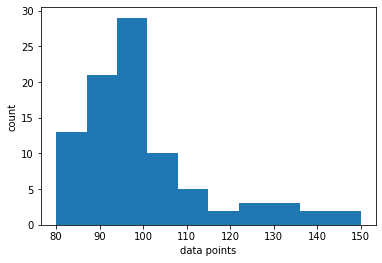

In [128]:
plt.hist(df.pulse)
plt.xlabel('data points')
plt.ylabel('count')
plt.title('Histogram of pulse')
plt.show()

# In histogram X - axis tells you about the bin range and Y-axis tells you about the count

<AxesSubplot:xlabel='pulse', ylabel='Density'>

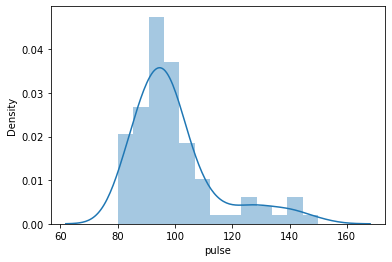

In [125]:
sns.distplot(df.pulse) # X- axis tells you the bins (20)  where 60-80  y-axis tells you the percentage of distribution of the data 
# for example in this pic(10% of the data falls under the data points of 60-80)

In [137]:
import numpy as np
from pylab import *

# creating some test data
X=np.arange(-2,2,0.01)
Y=exp(-X**2)
print(Y)

[0.01831564 0.01906121 0.01983316 0.02063225 0.02145924 0.02231491
 0.02320007 0.02411551 0.02506206 0.02604056 0.02705185 0.02809679
 0.02917626 0.03029114 0.03144234 0.03263076 0.03385732 0.03512297
 0.03642864 0.03777529 0.0391639  0.04059542 0.04207086 0.0435912
 0.04515745 0.04677062 0.04843173 0.05014181 0.05190189 0.05371301
 0.05557621 0.05749254 0.05946306 0.06148881 0.06357087 0.06571027
 0.0679081  0.0701654  0.07248323 0.07486266 0.07730474 0.07981052
 0.08238104 0.08501734 0.08772047 0.09049144 0.09333128 0.09624098
 0.09922155 0.10227398 0.10539922 0.10859825 0.11187199 0.11522138
 0.11864731 0.12215067 0.12573233 0.12939313 0.13313389 0.13695539
 0.14085842 0.14484371 0.14891196 0.15306387 0.15730007 0.16162119
 0.16602781 0.17052046 0.17509966 0.17976587 0.18451952 0.18936101
 0.19429066 0.19930878 0.20441562 0.20961139 0.21489623 0.22027027
 0.22573354 0.23128606 0.23692776 0.24265854 0.24847824 0.25438663
 0.26038343 0.2664683  0.27264083 0.27890055 0.28524695 0.29167

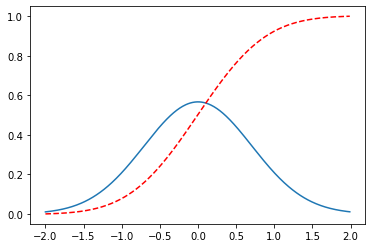

In [129]:
import numpy as np
from pylab import *

# Create some test data
dx = 0.01
X  = np.arange(-2, 2, dx)
Y  = exp(-X ** 2)

# Normalize the data to a proper PDF
Y /= (dx * Y).sum()

# Compute the CDF
CY = np.cumsum(Y * dx)

# Plot both
plot(X, Y)
plot(X, CY, 'r--')

show()

In [135]:
exp(-2**2)

0.01831563888873418

In [139]:
750*2/3

500.0